BODY PERFORMANCE PREDICTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ABOUT THE DATASET

*This dataset consist of 12 features:
age:21-64
gender:M,F
height:Height in cm.
weight:weight in kg.
body fat:The percentage of body fat.
diastolic:Heartbeat when the heart muscle relaxes and allows the chambers to fill with blood.
systolic:Measures the pressure in arteries when heartbeats.
gripForce:Measure of muscular strength.
sit and bend forward:seated forward bend is a symmetrical yoga posture that stretches the entire back body.
sit ups counts:lie on back and use stomach muscles to raise the top part of your body to a sitting position.
board jump: To jump the farthest distance possible from a standing start to a fixed mark.
class:Output consist of 4 grades A,B,C,D.

Load the dataset

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/projects/bodyPerformance1.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,NaN,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,NaN,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


Import libraries

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc


visualization tool:Seaborn

<Axes: xlabel='gender', ylabel='count'>

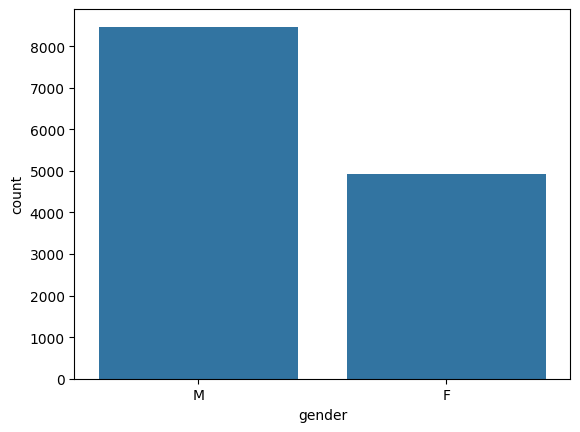

In [ ]:
sns.countplot(x='gender',data=df)

<Axes: xlabel='gender', ylabel='gripForce'>

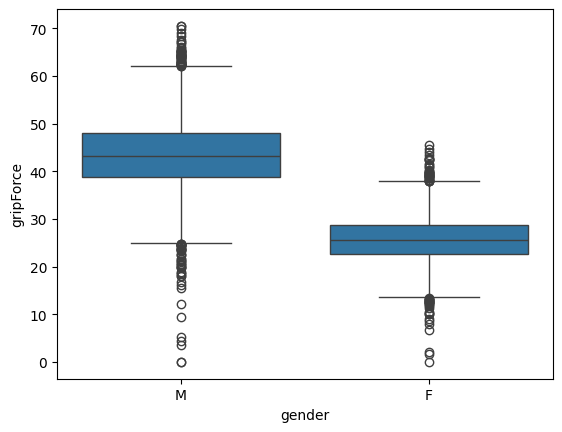

In [ ]:
sns.boxplot(x='gender',y='gripForce',data=df)

In [ ]:
df.isna().sum()

age                        0
gender                     0
height_cm                  2
weight_kg                  0
body fat_%                 0
diastolic                  3
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [ ]:
df.dtypes

age                          int64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

In [ ]:
df['height_cm']=df['height_cm'].fillna(df['height_cm'].mean())
df['diastolic']=df['diastolic'].fillna(df['diastolic'].mode()[0])

In [ ]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [ ]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,80.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,80.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df.tail(2)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
13391,64,F,146.1,57.7,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D
13392,34,M,164.0,66.1,19.5,82.0,150.0,35.9,7.1,51.0,180.0,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int64  
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [ ]:

le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['class']=le.fit_transform(df['class'])

In [ ]:
df['class'].unique()

array([2, 0, 1, 3])

In [ ]:
X=df.iloc[:,0:-1]
X

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31,1,179.6,78.00,20.1,80.0,152.0,44.8,12.0,49.0,181.0
3,32,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28,1,173.8,67.70,17.1,80.0,127.0,43.5,27.1,45.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...
13388,25,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0
13389,21,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0
13390,39,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0
13391,64,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0


In [ ]:
y=df.iloc[:,-1]
y

0        2
1        0
2        2
3        1
4        1
        ..
13388    2
13389    3
13390    0
13391    3
13392    2
Name: class, Length: 13393, dtype: int64

In [ ]:

mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)
X_scaled

array([[0.13953488, 1.        , 0.6875    , ..., 0.18235294, 0.75      ,
        0.71617162],
       [0.09302326, 1.        , 0.58139535, ..., 0.17352941, 0.6625    ,
        0.75577558],
       [0.23255814, 1.        , 0.79360465, ..., 0.15546218, 0.6125    ,
        0.59735974],
       ...,
       [0.41860465, 1.        , 0.75872093, ..., 0.17394958, 0.5625    ,
        0.75577558],
       [1.        , 0.        , 0.30668605, ..., 0.14369748, 0.        ,
        0.24752475],
       [0.30232558, 1.        , 0.56686047, ..., 0.13487395, 0.6375    ,
        0.59405941]])

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
#knn
knn=KNeighborsClassifier(n_neighbors=21)
#svc
svc=SVC()
#naive bayes
nbs=GaussianNB()
#decision tree
dt=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=1)
#random forest
rf=RandomForestClassifier(random_state=2,criterion='gini',max_depth=20)
#adaboost
ada=AdaBoostClassifier(random_state=1)
#xgboost
xg=XGBClassifier(max_depth=8,random_state=5)


models=[knn,svc,nbs,dt,rf,ada,xg]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))


KNeighborsClassifier(n_neighbors=21)
              precision    recall  f1-score   support

           0       0.59      0.80      0.68       991
           1       0.42      0.44      0.43       998
           2       0.53      0.48      0.50       995
           3       0.88      0.63      0.74      1034

    accuracy                           0.59      4018
   macro avg       0.61      0.59      0.59      4018
weighted avg       0.61      0.59      0.59      4018

SVC()
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       991
           1       0.45      0.47      0.46       998
           2       0.56      0.55      0.56       995
           3       0.85      0.73      0.78      1034

    accuracy                           0.63      4018
   macro avg       0.63      0.63      0.63      4018
weighted avg       0.63      0.63      0.63      4018

GaussianNB()
              precision    recall  f1-score   support

           0       

Visualization tool:Matplotlib

Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

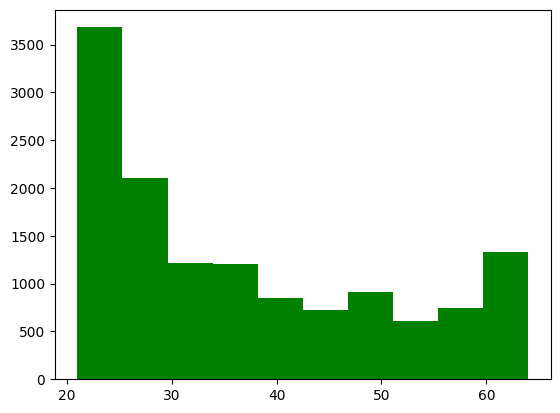

In [ ]:

x=X['age']
y=X['height_cm']
plt.hist(x,color='g')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

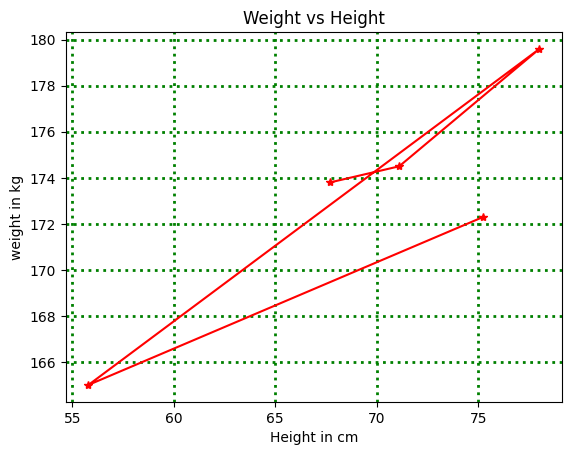

In [ ]:
z=X.iloc[0:5,:]
z
x=z['weight_kg']
y=z['height_cm']
plt.xlabel("Height in cm")
plt.ylabel("weight in kg")
plt.title("Weight vs Height")
plt.plot(x,y,color='r',marker='*')
plt.grid(color='g',linestyle='dotted',linewidth=2)
plt.show

Hyperparameter tunning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
clf=GridSearchCV(svc,params,cv=5,refit = True, verbose = 3)
clf.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.554 total time=   5.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.563 total time=   4.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.530 total time=   3.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   5.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.581 total time=   4.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.437 total time=   4.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.481 total time=   6.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.476 total time=   4.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.475 total time=   6.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.478 total time=   5.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.252 total time=   5.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(clf.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
svc1=SVC(C=1000,gamma= 1,kernel='rbf')
svc1.fit(X_train,y_train)
y_pred1=svc1.predict(X_test)
y_pred1
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.80      0.75       991
           1       0.54      0.58      0.56       998
           2       0.65      0.60      0.62       995
           3       0.87      0.77      0.82      1034

    accuracy                           0.69      4018
   macro avg       0.69      0.69      0.69      4018
weighted avg       0.69      0.69      0.69      4018



AFTER FEATURE SELECTION

In [ ]:
df.corr()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
age,1.000000,-0.060229,-0.293860,-0.099966,0.242302,0.158520,0.211167,-0.179583,-0.070033,-0.544581,-0.435172,0.065612
gender,-0.060229,1.000000,0.730843,0.672887,-0.551407,0.228541,0.323921,0.800184,-0.327467,0.474596,0.704149,0.075605
height_cm,-0.293860,0.730843,1.000000,0.734942,-0.515197,0.146057,0.210290,0.734787,-0.222052,0.500254,0.674463,0.037863
weight_kg,-0.099966,0.672887,0.734942,1.000000,-0.084065,0.262245,0.338943,0.700119,-0.296249,0.294899,0.479564,0.214129
body fat_%,0.242302,-0.551407,-0.515197,-0.084065,1.000000,0.047989,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273,0.341956
diastolic,0.158520,0.228541,0.146057,0.262245,0.047989,1.000000,0.676217,0.202038,-0.071965,0.016515,0.097287,0.066711
systolic,0.211167,0.323921,0.210290,0.338943,-0.030376,0.676217,1.000000,0.286012,-0.082434,0.056276,0.152894,0.035484
gripForce,-0.179583,0.800184,0.734787,0.700119,-0.541788,0.202038,0.286012,1.000000,-0.112577,0.576669,0.746853,-0.136088
sit and bend forward_cm,-0.070033,-0.327467,-0.222052,-0.296249,-0.071225,-0.071965,-0.082434,-0.112577,1.000000,0.177153,0.026487,-0.588123
sit-ups counts,-0.544581,0.474596,0.500254,0.294899,-0.608912,0.016515,0.056276,0.576669,0.177153,1.000000,0.748273,-0.452832


In [ ]:
# X=X.drop(['age','gender','height_cm','diastolic','systolic'],axis=1)
# X

In [ ]:

# mms1=MinMaxScaler()
# X_scaled1=mms1.fit_transform(X)
# X_scaled1

In [ ]:

# X_train,X_test,y_train,y_test=train_test_split(X_scaled1,y,test_size=0.3,random_state=1)

In [ ]:
from xgboost import XGBClassifier
xg1=XGBClassifier(random_state=5,max_depth=8)
xg1.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pree=xg1.predict(X_test)
y_pree

array([2, 0, 0, ..., 3, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pree))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       991
           1       0.62      0.63      0.62       998
           2       0.73      0.64      0.68       995
           3       0.90      0.83      0.86      1034

    accuracy                           0.74      4018
   macro avg       0.74      0.74      0.74      4018
weighted avg       0.75      0.74      0.74      4018



Visualization tool:Seaborn

<Axes: >

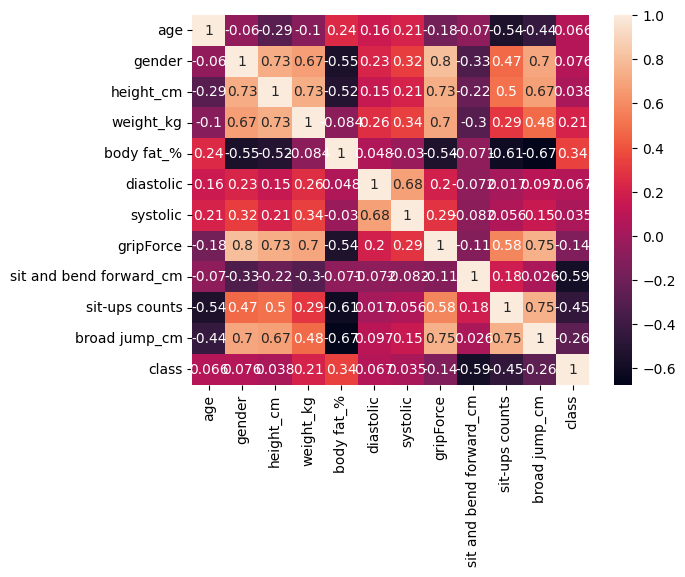

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='gender', ylabel='broad jump_cm'>

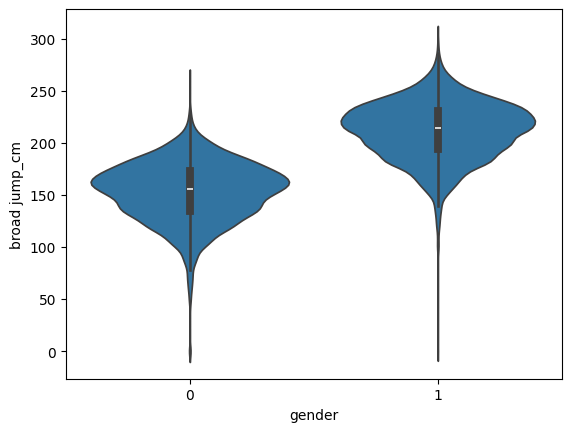

In [ ]:
# t=X.iloc[0:50,:]
# t
sns.violinplot(x='gender',y='broad jump_cm',data=df)

Model Deployment

XGB classifier

In [ ]:
xgb=XGBClassifier(max_depth=8,random_state=5)
xgb.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pre=xgb.predict(X_test)
y_pre

array([2, 0, 0, ..., 3, 1, 1])

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       991
           1       0.62      0.63      0.62       998
           2       0.73      0.64      0.68       995
           3       0.90      0.83      0.86      1034

    accuracy                           0.74      4018
   macro avg       0.74      0.74      0.74      4018
weighted avg       0.75      0.74      0.74      4018



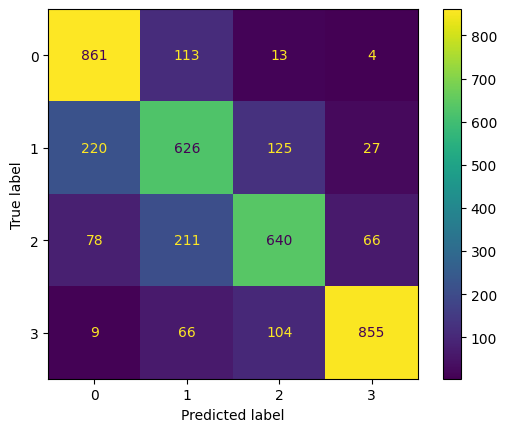

In [ ]:

print(classification_report(y_test,y_pre))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pre))

ROC and AUC curve

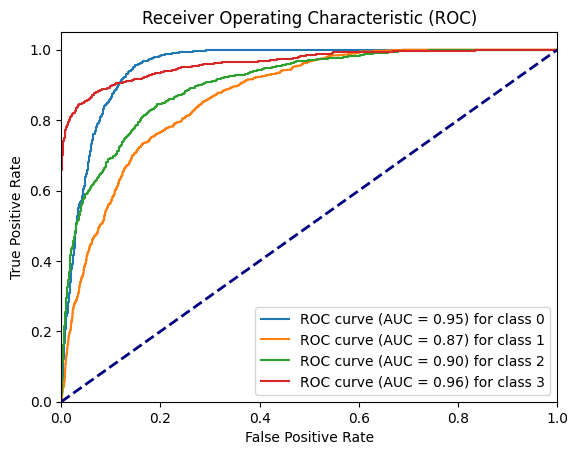

In [ ]:
# Train a XGBClassifier model
model = XGBClassifier(multi_class='ovr')
model.fit(X_train, y_train)

# # Predict probabilities on the test set
probs = model.predict_proba(X_test)

# # Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curve for each class
plt.figure()
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

 XGBclassifier model deployment

In [ ]:
import pickle
pickle.dump(xgb,open('m2.sav','wb'))

In [ ]:
pickle.dump(mms,open('s2.sav','wb'))

Best model deployment can be done using XGBClassifier with higher accuracy of 74%.

In [ ]:
# rfc=RandomForestClassifier(random_state=2,criterion='gini',max_depth=25)
# rfc.fit(X_train,y_train)


In [ ]:
# y_predict1=rfc.predict(X_test)
# y_predict1

In [ ]:

# print(classification_report(y_test,y_predict1))
# print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict1))

In [ ]:
# import pickle
# pickle.dump(rfc,open('m3.sav','wb'))


In [ ]:
# pickle.dump(mms,open('s3.sav','wb'))